# **Exploratory Data Analysis Lab**
Estimated time needed: **30** minutes

In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis. You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.

# Objectives
In this lab you will perform the following:

* Identify the distribution of data in the dataset.

* Identify outliers in the dataset.

* Remove outliers from the dataset.

* Identify correlation between features in the dataset.

# Hands on Lab
Import pandas module and load the dataset into a dataframe.

In [1]:
import pandas as pd
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [2]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              11398 non-null  int64  
 1   MainBranch              11398 non-null  object 
 2   Hobbyist                11398 non-null  object 
 3   OpenSourcer             11398 non-null  object 
 4   OpenSource              11317 non-null  object 
 5   Employment              11398 non-null  object 
 6   Country                 11398 non-null  object 
 7   Student                 11347 non-null  object 
 8   EdLevel                 11286 non-null  object 
 9   UndergradMajor          10661 non-null  object 
 10  EduOther                11234 non-null  object 
 11  OrgSize                 11302 non-null  object 
 12  DevType                 11333 non-null  object 
 13  YearsCode               11389 non-null  object 
 14  Age1stCode              11385 non-null

# **Distribution**
# Determine how the data is distributed
The column <code>ConvertedComp</code> contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.

Plot the distribution curve for the column <code>ConvertedComp</code>.

Text(0, 0.5, 'Number of Respondents')

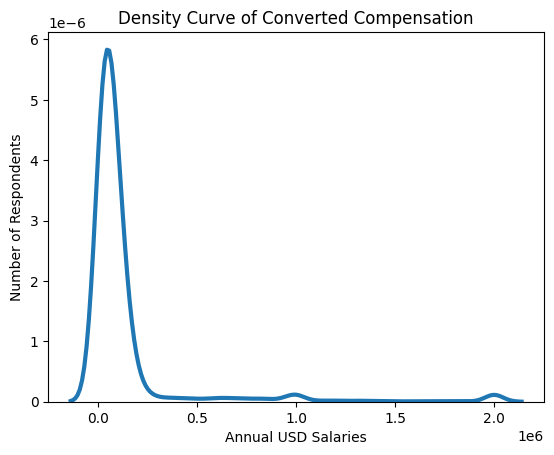

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Draw the density plot
sns.kdeplot(df['ConvertedComp'], linewidth=3)

# Plot formatting
plt.title('Density Curve of Converted Compensation')
plt.xlabel('Annual USD Salaries')
plt.ylabel('Number of Respondents')

Plot the histogram for the column <code>ConvertedComp</code>.

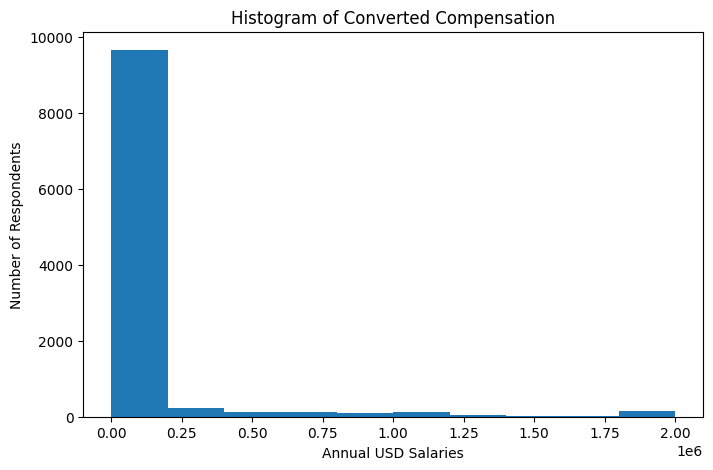

In [8]:
df['ConvertedComp'].plot(kind='hist', figsize=(8, 5))

# add a title to the histogram
plt.title('Histogram of Converted Compensation')
# add y-label
plt.ylabel('Number of Respondents')
# add x-label
plt.xlabel('Annual USD Salaries')

plt.show()

What is the median of the column <code>ConvertedComp</code>?

In [9]:
df['ConvertedComp'].describe()

,ConvertedComp
count,1.058200e+04
mean,1.315967e+05
std,2.947865e+05
min,0.000000e+00
25%,2.686800e+04
50%,5.774500e+04
75%,1.000000e+05
max,2.000000e+06


How many responders identified themselves only as a **Man**?

In [10]:
df['Gender'].value_counts()

,count
Gender,
Man,10480
Woman,731
"Non-binary, genderqueer, or gender non-conforming",63
"Man;Non-binary, genderqueer, or gender non-conforming",26
"Woman;Non-binary, genderqueer, or gender non-conforming",14
Woman;Man,9
"Woman;Man;Non-binary, genderqueer, or gender non-conforming",2


Find out the median ConvertedComp of responders identified themselves only as a **Woman**?

In [11]:
df.loc[(df['Gender'] == 'Woman'), 'ConvertedComp'].median()

57708.0

Give the five number summary for the column <code>Age</code>?

min,q1,median,q3,max of a column are its five number summary.

In [12]:
df['Age'].describe()

,Age
count,11111.000000
mean,30.778895
std,7.393686
min,16.000000
25%,25.000000
50%,29.000000
75%,35.000000
max,99.000000


Plot a histogram of the column <code>Age</code>.

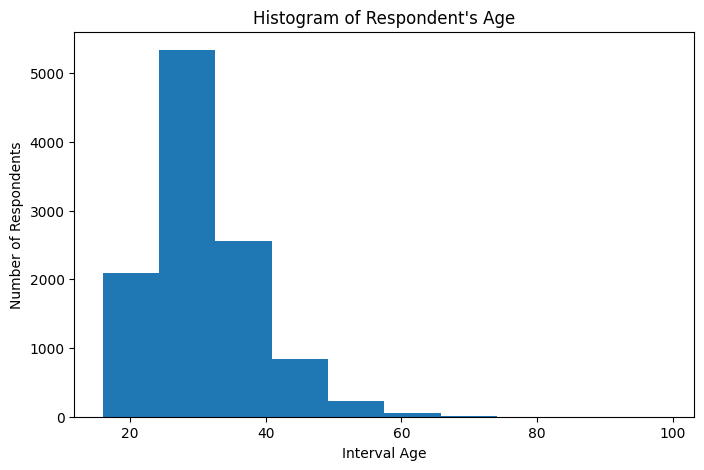

In [13]:
df['Age'].plot(kind='hist', figsize=(8, 5))

# add a title to the histogram
plt.title("Histogram of Respondent's Age")
# add y-label
plt.ylabel('Number of Respondents')
# add x-label
plt.xlabel('Interval Age')

plt.show()

# **Outliers**
# Finding outliers
Find out if outliers exist in the column <code>ConvertedComp</code> using a box plot?

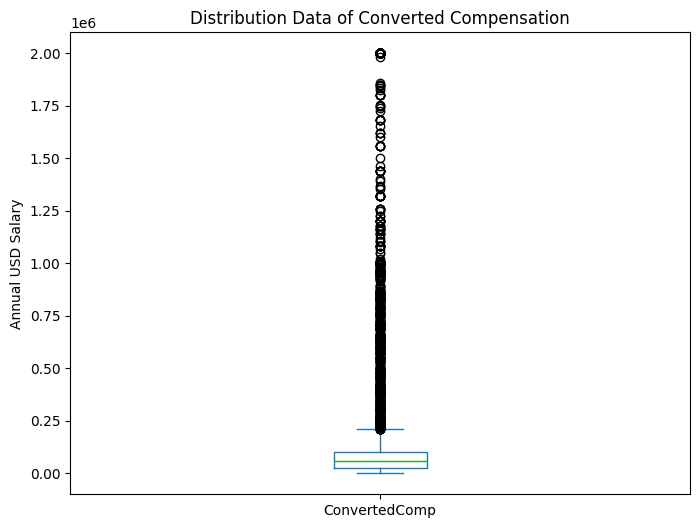

In [14]:
df['ConvertedComp'].plot(kind='box', figsize=(8, 6))

plt.title('Distribution Data of Converted Compensation')
plt.ylabel('Annual USD Salary')

plt.show()

Find out the Inter Quartile Range for the column <code>ConvertedComp</code>.

In [15]:
df['ConvertedComp'].describe()

,ConvertedComp
count,1.058200e+04
mean,1.315967e+05
std,2.947865e+05
min,0.000000e+00
25%,2.686800e+04
50%,5.774500e+04
75%,1.000000e+05
max,2.000000e+06


In [16]:
# Q1, Q3, and IQR
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
IQR

np.float64(73132.0)

Find out the upper and lower bounds.

In [17]:
# your code goes here
upper_bounds = Q3 + 1.5 * IQR
print('Upper Bounds :', upper_bounds)
lower_bounds = Q1 - 1.5*IQR
print('Lower Bounds :', lower_bounds)

Upper Bounds : 209698.0
Lower Bounds : -82830.0


Identify how many outliers are there in the <code>ConvertedComp</code> column.

In [19]:
outlier =[]
for x in df['ConvertedComp']:
  if ((x > upper_bounds) or (x < lower_bounds)):
    outlier.append(x)
print('outlier in the ConvertedComp column is', len(outlier))

outlier in the ConvertedComp column is 879


Create a new dataframe by removing the outliers from the <code>ConvertedComp</code> column.

In [20]:
# Removing outliers
df_removed_outlier = df['ConvertedComp'][~((df['ConvertedComp'] < lower_bounds) |
                                           (df['ConvertedComp'] > upper_bounds))]

In [21]:
df_removed_outlier.describe()

,ConvertedComp
count,9703.000000
mean,59883.208389
std,43394.336755
min,0.000000
25%,24060.000000
50%,52704.000000
75%,85574.500000
max,209356.000000


Create a boxplot with outliers removed

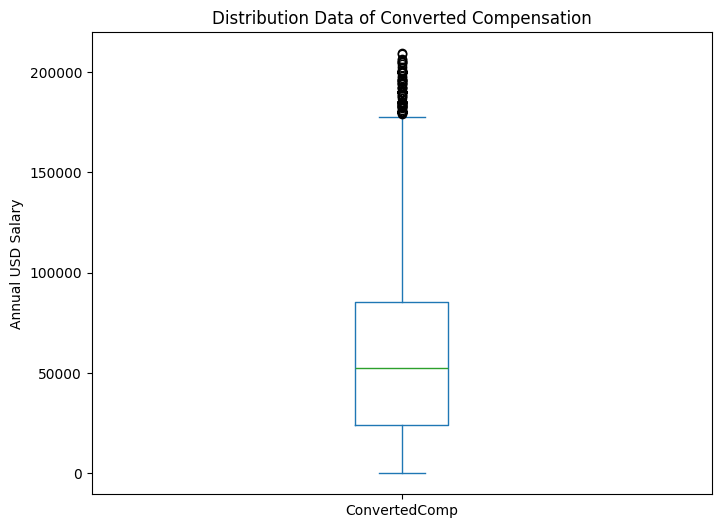

In [23]:
df_removed_outlier.plot(kind='box', figsize=(8, 6))

plt.title('Distribution Data of Converted Compensation')
plt.ylabel('Annual USD Salary')

plt.show()

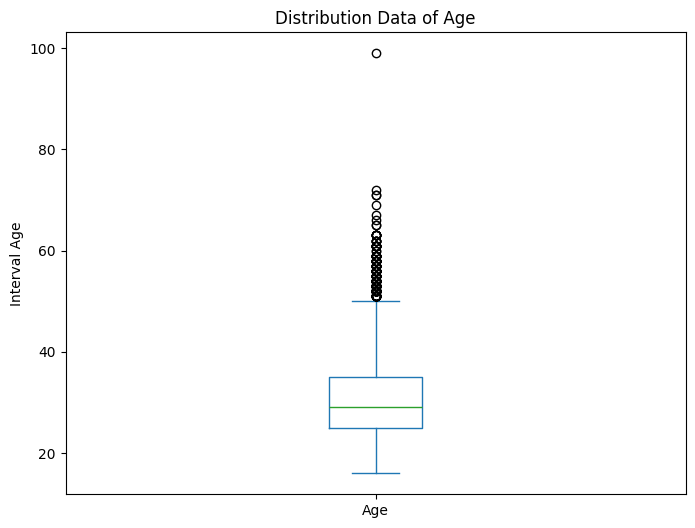

In [22]:
df['Age'].plot(kind='box', figsize=(8, 6))

plt.title('Distribution Data of Age')
plt.ylabel('Interval Age')

plt.show()

# **Correlation**
# Finding correlation
Find the correlation between <code>Age</code> and all other numerical columns.

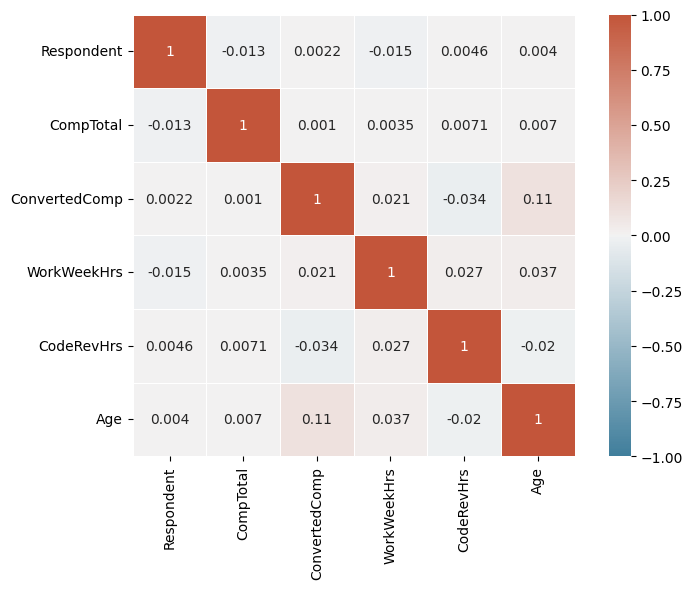

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.select_dtypes(include=['number']).corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap=cmap, annot=True, center=0, vmin=-1, square=True, linewidths=.5)
plt.tight_layout()
plt.show()